In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from matplotlib import rcParams
import plotly.graph_objs as go
from datetime import timedelta
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## Loading The Dataset:

In [2]:
work = pd.read_excel('ecommerce.xlsx')
work

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice  CustomerID         Country  
0       2016-11-29       2.55     17850.0  United Kingdom  
1       2016-11-29       3.39     17850.0  United Kingdom  
2       2016-11-29       2.75     17850.0  United Kingdom  
3       2016-11-29       3.39     17850.0  United Kingdom  
4       2016-11-29       3.39     17850.0  United Kingdom  
...            ...        ...         ...             ...  
541904  2017-12-07       0.85     12680.0          France  
541905  2017-12-07       2.10     12680.0          France  
541906  2017-12-07       4.15     12680.0          France  
541907  2017-12-07       4.15     12680.0          France  
541908  2017-12-07       4.95     12680.0          France  

[541909 rows x 8 columns]

In [3]:
work.sample(6)

InvoiceNo StockCode                       Description  Quantity  \
152774    549690     22920                 HERB MARKER BASIL         1   
79064     542906     21401                BLUE PUDDING SPOON         1   
92862     544206     22197              SMALL POPCORN HOLDER         7   
402777    571508     22699  ROSES REGENCY TEACUP AND SAUCER          2   
46261     540352     21025                        SPACE FROG         2   
77711     542779     22423          REGENCY CAKESTAND 3 TIER         6   

       InvoiceDate  UnitPrice  CustomerID         Country  
152774  2017-04-09       0.65     17841.0  United Kingdom  
79064   2017-01-30       0.83         NaN  United Kingdom  
92862   2017-02-15       1.63         NaN  United Kingdom  
402777  2017-10-15       5.79         NaN  United Kingdom  
46261   2017-01-04       0.85         NaN  United Kingdom  
77711   2017-01-30      12.75     17147.0  United Kingdom

In [4]:
work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


##### I can observe missing values in the CustomerID and Description hence, I will check for how much missing values are in the Description and CustomerID 

### Missing values in Dataset:

In [5]:
work_info = pd.DataFrame(work.isnull().sum()).T.rename(index={0: 'NAN'})
work_pct = pd.DataFrame(work.isnull().sum() / work.shape[0] * 100).T.rename(index={0: '%'})
work_info = pd.concat([work_info, work_pct])

display(work_info)

InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
NAN        0.0        0.0  1454.000000       0.0          0.0        0.0   
%          0.0        0.0     0.268311       0.0          0.0        0.0   

        CustomerID  Country  
NAN  135080.000000      0.0  
%        24.926694      0.0

### Note:
I can observe that only CustomerID and Description columns contain missing values.

For the CustomerID, I can observe about 135,080 missing values that make up almost 25% of the total data; therefore, dropping missing values from the CustomerID column is not a great idea. Hence, I forward fill missing values in CustomerID.

The Forward fill method is mostly used in Time series data. It works by simply imputing missing values with previous values. 

The forward Fill method is utilized because loading the data in MS Excel, it is safe to assume that on a certain day, the same customer bought different products from the store but maybe due to human error, it was not recored.

And for the Description column, I can observe that there are only 1,454 NAN values making up less than 1% of the total data in the dataset. Hence, I dropped the missing values in the Description column 

In [6]:
work['CustomerID'] = work["CustomerID"].fillna(method='ffill')

In [7]:
work.dropna(axis = 0, subset = ['Description'], inplace = True)

In [8]:
work_info = pd.DataFrame(work.isnull().sum()).T.rename(index={0: 'NAN'})
work_pct = pd.DataFrame(work.isnull().sum() / work.shape[0] * 100).T.rename(index={0: '%'})
work_info = pd.concat([work_info, work_pct])

display(work_info)

InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
NAN        0.0        0.0          0.0       0.0          0.0        0.0   
%          0.0        0.0          0.0       0.0          0.0        0.0   

     CustomerID  Country  
NAN         0.0      0.0  
%           0.0      0.0

## Outliers Detection using Boxplot:
The Boxplot is a useful technique to review the distribution of each feature in the dataset and also helps to identify outliers through the dots outside the whiskers

<Axes: ylabel='Quantity'>

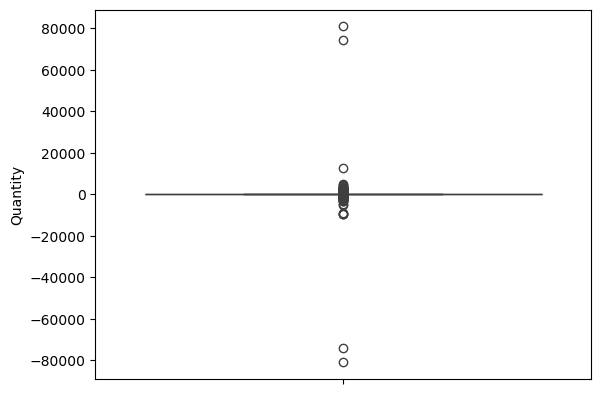

In [9]:
sns.boxplot(work['Quantity'])

<Axes: ylabel='UnitPrice'>

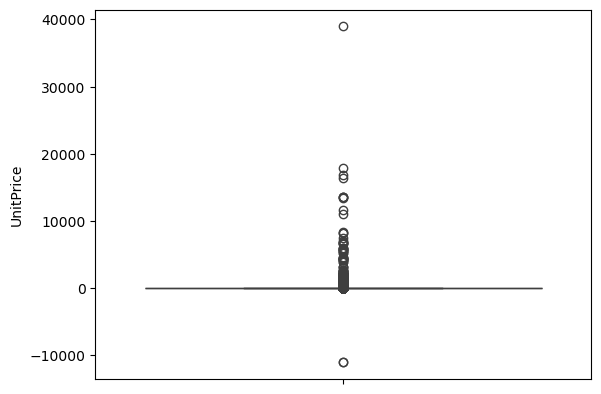

In [10]:
sns.boxplot(work['UnitPrice'])

##### I can observe that there are negative values in the quantity column, hence, I will filter out only Positive values for quantity
##### And in the UnitPrice, I can observe values less than 0, hence, I will select only values >= 0.1

<Axes: ylabel='Quantity'>

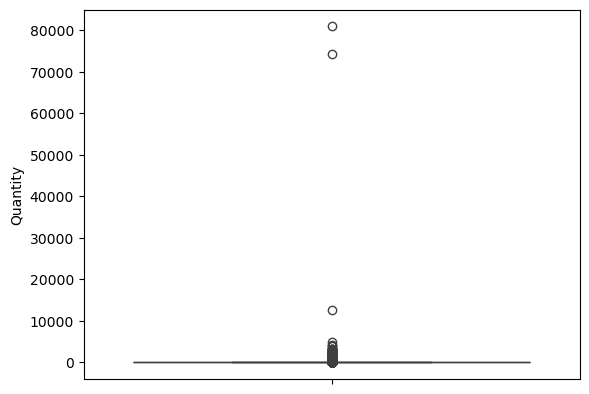

In [11]:
work = work[(work['Quantity']>0)]
sns.boxplot(work['Quantity'])

<Axes: ylabel='UnitPrice'>

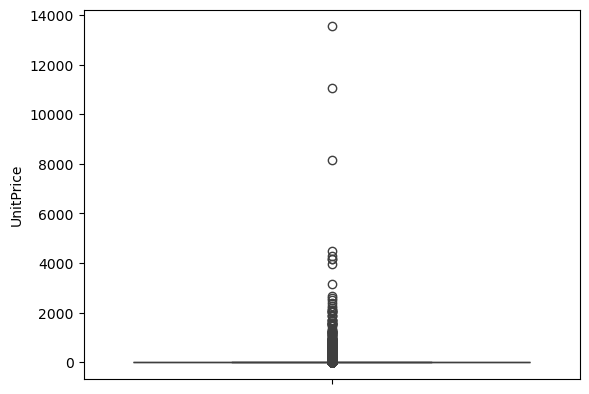

In [12]:
work = work[(work['UnitPrice']>=0.1)]
sns.boxplot(work['UnitPrice'])

In [13]:
work.sample(10)

InvoiceNo StockCode                          Description  Quantity  \
91968     544162     22920                    HERB MARKER BASIL         5   
65639     541696     22441    GROW YOUR OWN BASIL IN ENAMEL MUG         1   
433230    573905     23302       KNEELING MAT HOUSEWORK  DESIGN         1   
523975    580526     22577  WOODEN HEART CHRISTMAS SCANDINAVIAN        24   
258247    559557     22423             REGENCY CAKESTAND 3 TIER         1   
450939    575177     22981                   PANTRY APPLE CORER         1   
536902    581225     22952      60 CAKE CASES VINTAGE CHRISTMAS        24   
199392    554097     22556       PLASTERS IN TIN CIRCUS PARADE         12   
98117     544670    85188A           GREEN METAL SWINGING BUNNY         2   
466283    576326     22659              LUNCH BOX I LOVE LONDON         2   

       InvoiceDate  UnitPrice  CustomerID         Country  
91968   2017-02-14       0.65     14959.0  United Kingdom  
65639   2017-01-18       4.13     17364.0  United Kingdom  
433230  2017-10-30       1.65     16971.0  United Kingdom  
523975  2017-12-02       0.29     16535.0  United Kingdom  
258247  2017-07-09      12.75     17444.0          Canada  
450939  2017-11-06       2.92     14156.0  United Kingdom  
536902  2017-12-06       0.55     17677.0  United Kingdom  
199392  2017-05-20       1.65     12567.0          France  
98117   2017-02-20       0.85     16161.0  United Kingdom  
466283  2017-11-12       1.95     16504.0  United Kingdom

## Data Analysis:


#### Now i will perform Data Analysis on the following
* Products
* Transactions

* ### Products Analysis:

In [14]:
work.sample(5)

InvoiceNo StockCode                       Description  Quantity  \
427338    573382     48188           DOORMAT WELCOME PUPPIES         2   
128150    547250     21638    ASSORTED TUTTI FRUTTI NOTEBOOK         2   
259699    559704     21245             GREEN POLKADOT PLATE          8   
527342    580705     22437     SET OF 9 BLACK SKULL BALLOONS        40   
172844    551564     22699  ROSES REGENCY TEACUP AND SAUCER          6   

       InvoiceDate  UnitPrice  CustomerID         Country  
427338  2017-10-28       8.25     17655.0  United Kingdom  
128150  2017-03-20       4.13     18225.0  United Kingdom  
259699  2017-07-10       1.69     12669.0          France  
527342  2017-12-03       0.85     12683.0          France  
172844  2017-05-01       2.95     16609.0  United Kingdom

* I will create TotalPrice column to calculate how much is spent

In [15]:
work['TotalPrice'] = work['Quantity'] * work['UnitPrice']
work.sample(5)

InvoiceNo StockCode                        Description  Quantity  \
172794    551559    84800S   SMALL WHITE/PINK ROSE ART FLOWER        36   
387512    570293     22572     ROCKING HORSE GREEN CHRISTMAS         12   
366949    568803    47504K      ENGLISH ROSE GARDEN SECATEURS       120   
484182    577524     22572     ROCKING HORSE GREEN CHRISTMAS          1   
196723    553860     82482  WOODEN PICTURE FRAME WHITE FINISH         2   

       InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
172794  2017-05-01       1.06     16133.0  United Kingdom       38.16  
387512  2017-10-08       0.85     14128.0  United Kingdom       10.20  
366949  2017-09-27       0.79     15030.0  United Kingdom       94.80  
484182  2017-11-18       0.85     16905.0  United Kingdom        0.85  
196723  2017-05-17       2.55     17841.0  United Kingdom        5.10

* #### Now i will check for the top 10 products that generated the highest revenue

In [16]:
product_revenue = work.groupby(['StockCode', 'Description'], as_index=False)['TotalPrice'].sum()
product_revenue = product_revenue.rename(columns={'TotalPrice': 'Total Revenue'})
product_revenue.sort_values(by='Total Revenue', ascending=False, inplace=True)
product_revenue.head(10)

StockCode                         Description  Total Revenue
4150       DOT                      DOTCOM POSTAGE      206248.77
1262     22423            REGENCY CAKESTAND 3 TIER      174484.74
2590     23843         PAPER CRAFT , LITTLE BIRDIE      168469.60
3773    85123A  WHITE HANGING HEART T-LIGHT HOLDER      104340.29
2669     47566                       PARTY BUNTING       99504.33
3761    85099B             JUMBO BAG RED RETROSPOT       94340.05
2045     23166      MEDIUM CERAMIC TOP STORAGE JAR       81700.92
4152      POST                             POSTAGE       78101.88
4151         M                              Manual       78078.69
1951     23084                  RABBIT NIGHT LIGHT       66964.99

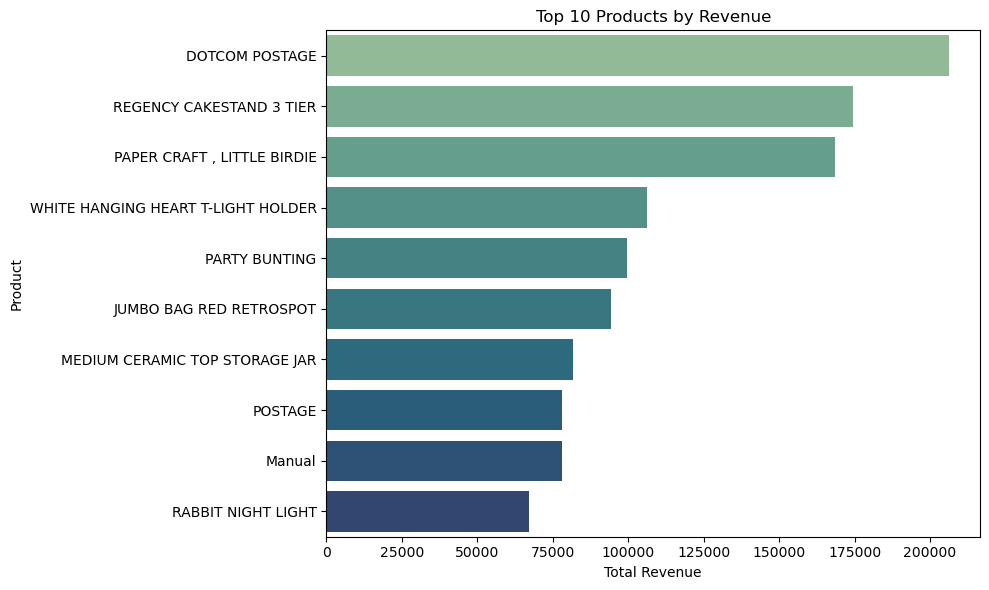

In [17]:
top_revenue = (
    work.groupby(['Description'], as_index=False)['TotalPrice']
    .sum()
    .sort_values(by='TotalPrice', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_revenue, x='TotalPrice', y='Description', palette='crest')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


* ##### I can observe that Dotcom Postage, Regency Cakestand 3 Tier, Papaer Craft, Little Birdie leads the 3 products that generated the highest revenue

### Now i will check for the most ordered product by Quantity:

In [18]:
product_popularity_qty = (
    work.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

product_popularity_qty.columns = ['Product', 'Total Quantity Ordered']
product_popularity_qty.head(10)


Product  Total Quantity Ordered
0         PAPER CRAFT , LITTLE BIRDIE                   80995
1      MEDIUM CERAMIC TOP STORAGE JAR                   78033
2   WORLD WAR 2 GLIDERS ASSTD DESIGNS                   55047
3             JUMBO BAG RED RETROSPOT                   48474
4  WHITE HANGING HEART T-LIGHT HOLDER                   37891
5                      POPCORN HOLDER                   36761
6       ASSORTED COLOUR BIRD ORNAMENT                   36461
7     PACK OF 72 RETROSPOT CAKE CASES                   36419
8                  RABBIT NIGHT LIGHT                   30788
9             MINI PAINT SET VINTAGE                    26633

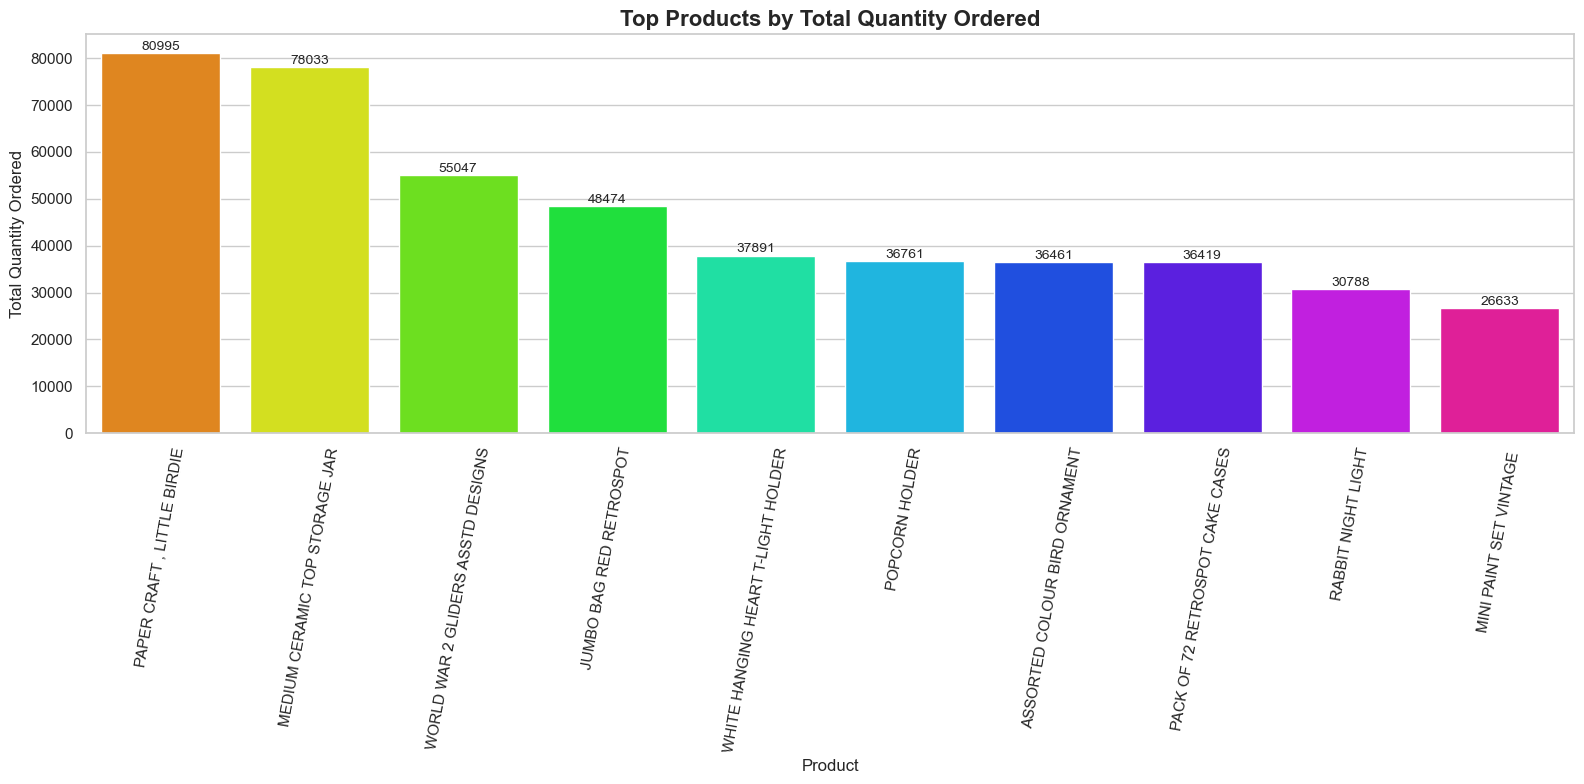

In [19]:
top_qty = product_popularity_qty.head(10)

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
palette_qty = sns.color_palette("hsv", len(top_qty))

bar = sns.barplot(data=top_qty, x='Product', y='Total Quantity Ordered', palette=palette_qty)

for i in range(len(top_qty)):
    bar.text(i, top_qty['Total Quantity Ordered'].iloc[i] + 5,
             f"{top_qty['Total Quantity Ordered'].iloc[i]}",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=80)
plt.title("Top Products by Total Quantity Ordered", fontsize=16, weight='bold')
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.tight_layout()
plt.show()


* ##### Paper Craft, Little Birdie has the highest number of units to be ordered with almost 81,000 units ordered followed by Medium Ceramic Top Storage Jar, World War 2 Gliders Asstd Designs with over 78,000 and 55,000 units respectively

#### Now I check for most widely liked product by customers:

In [20]:
product_popularity_customers = (
    work.groupby('Description')['CustomerID']
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)

product_popularity_customers.columns = ['Product', 'Unique Customers']
product_popularity_customers.head(10)


Product  Unique Customers
0            REGENCY CAKESTAND 3 TIER              1042
1  WHITE HANGING HEART T-LIGHT HOLDER              1009
2                       PARTY BUNTING               875
3             JUMBO BAG RED RETROSPOT               845
4     PACK OF 72 RETROSPOT CAKE CASES               811
5   SET OF 3 CAKE TINS PANTRY DESIGN                780
6     NATURAL SLATE HEART CHALKBOARD                765
7       ASSORTED COLOUR BIRD ORNAMENT               730
8            JAM MAKING SET WITH JARS               725
9               HEART OF WICKER SMALL               722

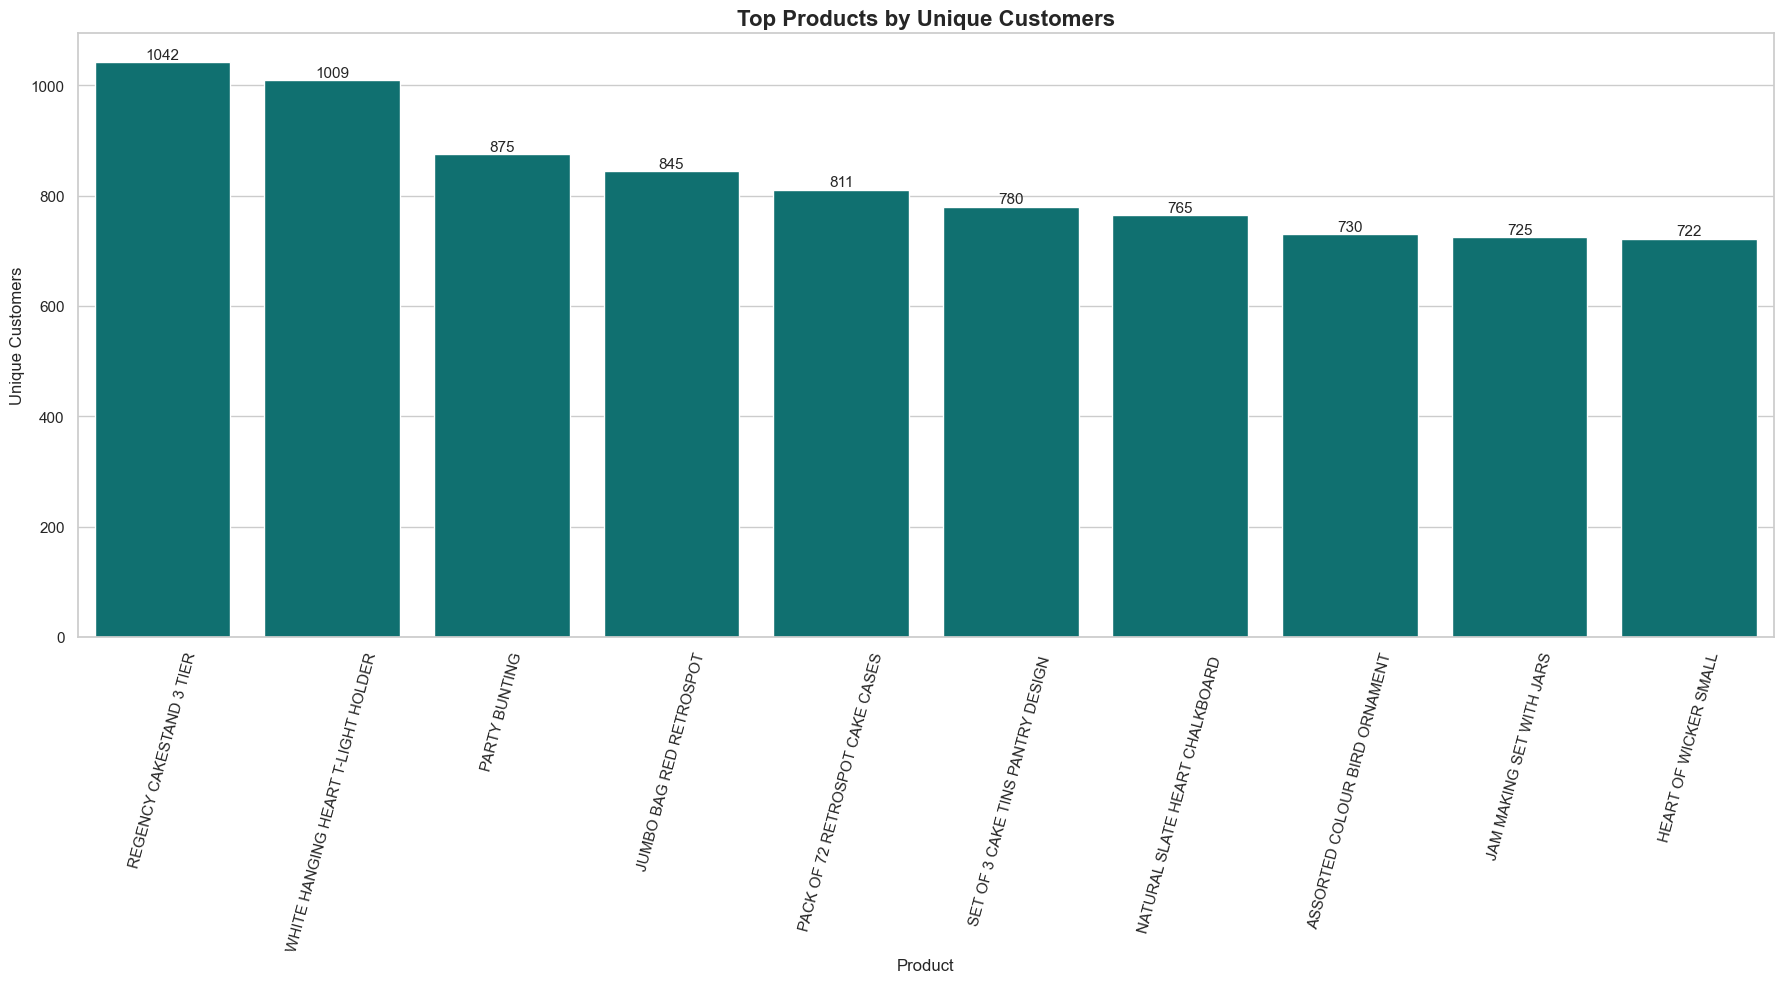

In [21]:
top_customers = product_popularity_customers.head(10)

plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# Use a single color for all bars
teal_color = '#008080'

bar = sns.barplot(
    data=top_customers,
    x='Product',
    y='Unique Customers',
    color=teal_color
)

for i in range(len(top_customers)):
    bar.text(i, top_customers['Unique Customers'].iloc[i] + 0.5,
             f"{top_customers['Unique Customers'].iloc[i]}",
             ha='center', va='bottom', fontsize=11)

plt.xticks(rotation=75)
plt.title("Top Products by Unique Customers", fontsize=16, weight='bold')
plt.xlabel("Product", fontsize=12)
plt.ylabel("Unique Customers", fontsize=12)
plt.tight_layout()
plt.show()


#### Regency cakesstand 3 tier, White Hanging Heart T-light Holder and Party Bunting are the most popular products often checked out by customers

### Now i check for rpoducts that are consistently bought across many orders

In [22]:
product_popularity_orders = (
    work.groupby('Description')['InvoiceNo']
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)

product_popularity_orders.columns = ['Product', 'Number of Orders']
product_popularity_orders.head(10)

Product  Number of Orders
0  WHITE HANGING HEART T-LIGHT HOLDER              2256
1             JUMBO BAG RED RETROSPOT              2089
2            REGENCY CAKESTAND 3 TIER              1988
3                       PARTY BUNTING              1685
4             LUNCH BAG RED RETROSPOT              1564
5       ASSORTED COLOUR BIRD ORNAMENT              1455
6   SET OF 3 CAKE TINS PANTRY DESIGN               1385
7     PACK OF 72 RETROSPOT CAKE CASES              1320
8             LUNCH BAG  BLACK SKULL.              1273
9     NATURAL SLATE HEART CHALKBOARD               1249

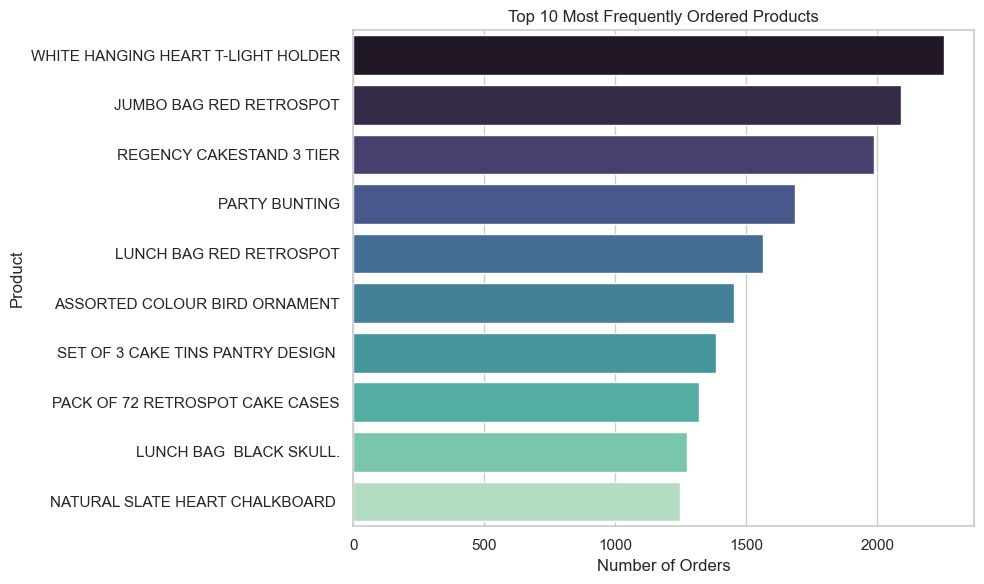

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

top10_orders = product_popularity_orders.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_orders, x='Number of Orders', y='Product', palette='mako')
plt.title("Top 10 Most Frequently Ordered Products")
plt.xlabel("Number of Orders")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


### Now I check for the probability of products demand:

In [24]:
repeat_customer_count = work.groupby('Description')['CustomerID'].nunique().reset_index()
repeat_customer_count.columns = ['Product', 'Customer Count']

total_customer_count = work['CustomerID'].nunique()

repeat_customer_count['Repeat Customer %'] = (
    repeat_customer_count['Customer Count'] / total_customer_count * 100
).round(2)

repeat_customer_count.sort_values(by='Repeat Customer %', ascending=False).head(10)


Product  Customer Count  Repeat Customer %
2852            REGENCY CAKESTAND 3 TIER            1042              23.99
3843  WHITE HANGING HEART T-LIGHT HOLDER            1009              23.23
2412                       PARTY BUNTING             875              20.14
1816             JUMBO BAG RED RETROSPOT             845              19.45
2337     PACK OF 72 RETROSPOT CAKE CASES             811              18.67
3132   SET OF 3 CAKE TINS PANTRY DESIGN              780              17.96
2197     NATURAL SLATE HEART CHALKBOARD              765              17.61
227        ASSORTED COLOUR BIRD ORNAMENT             730              16.80
1783            JAM MAKING SET WITH JARS             725              16.69
1662               HEART OF WICKER SMALL             722              16.62

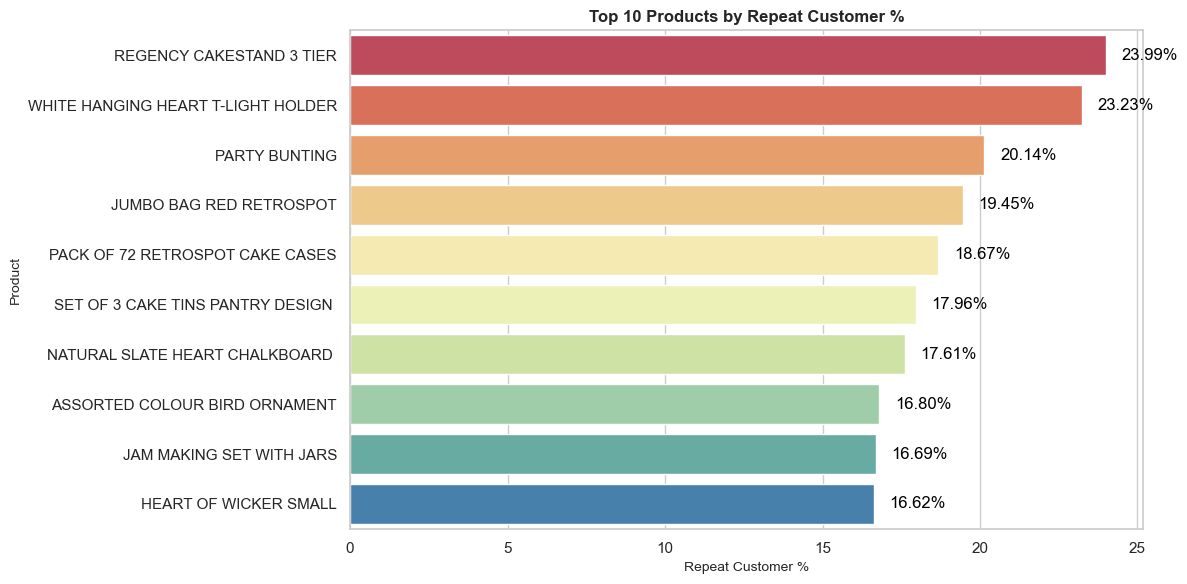

In [25]:
top_repeat_customers = repeat_customer_count.sort_values(
    by='Repeat Customer %', ascending=False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
palette = sns.color_palette("Spectral", len(top_repeat_customers))

barplot = sns.barplot(
    data=top_repeat_customers,
    x='Repeat Customer %',
    y='Product',
    palette=palette
)

for index, value in enumerate(top_repeat_customers['Repeat Customer %']):
    barplot.text(value + 0.5, index, f'{value:.2f}%', color='black', va='center')

plt.title('Top 10 Products by Repeat Customer %', fontsize=12, weight='bold')
plt.xlabel('Repeat Customer %', fontsize=10)
plt.ylabel('Product', fontsize=10)
plt.tight_layout()
plt.show()

### Transaction Analysis:

In [26]:
work['InvoiceDate'] = pd.to_datetime(work['InvoiceDate'])

# Extract day, month, year
work['day_of_week'] = work['InvoiceDate'].dt.dayofweek
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
work['DayName'] = work['day_of_week'].map(days)
work['Month'] = work['InvoiceDate'].dt.month
work['Year'] = work['InvoiceDate'].dt.year
work['MonthName'] = work['InvoiceDate'].dt.strftime('%B')

##### By Days of the week:

In [27]:
work['day_of_week'] = work['day_of_week'].apply(lambda x: days[x])
work['day_of_week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday', 'Monday'],
      dtype=object)

#### Note: 
I can observe that Friday is Missing. This may be due to reasons not stated 

In [28]:
weekly_transactions = (
    work.groupby(['Year', 'DayName'])['InvoiceNo']
    .nunique()
    .reset_index()
    .rename(columns={'InvoiceNo': 'Number of Transactions'})
)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_transactions['DayName'] = pd.Categorical(weekly_transactions['DayName'], categories=day_order, ordered=True)
weekly_transactions.sort_values(['Year', 'DayName'], inplace=True)

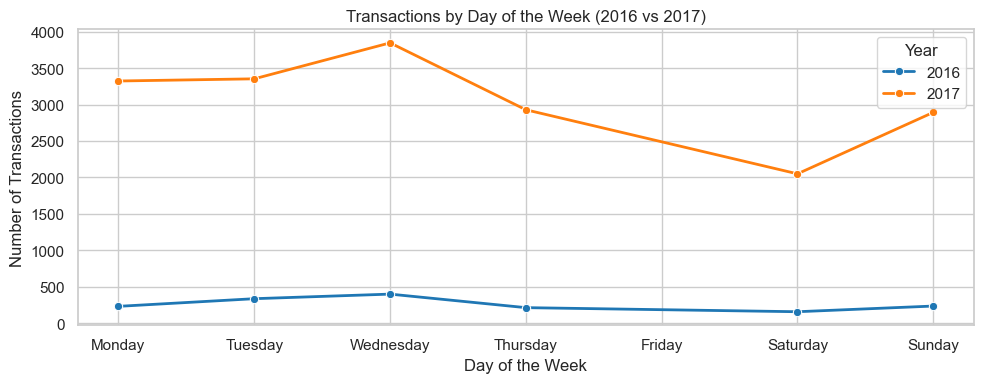

In [29]:
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

sns.lineplot(
    data=weekly_transactions,
    x='DayName',
    y='Number of Transactions',
    hue='Year',
    marker='o',
    palette='tab10',
    linewidth=2
)

plt.title('Transactions by Day of the Week (2016 vs 2017)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#### I can observe that in the year 2016 and 2017, Wednesdays recorded a bullish day for both years while Saturdays recorded bearish days for both years

##### By Months of the year:

In [30]:
# Group by Year and MonthName to get Revenue
monthly_revenue = (
    work.groupby(['Year', 'MonthName'])['TotalPrice']
    .sum()
    .reset_index()
    .rename(columns={'TotalPrice': 'Revenue'})
)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_revenue['MonthName'] = pd.Categorical(
    monthly_revenue['MonthName'],
    categories=month_order,
    ordered=True
)

revenue_pivot = monthly_revenue.pivot(index='MonthName', columns='Year', values='Revenue')
revenue_pivot.head(13)

Year            2016        2017
MonthName                       
January          NaN   741615.75
February         NaN   518282.45
March            NaN   698259.20
April            NaN   519064.77
May              NaN   816963.55
June             NaN   721584.67
July             NaN   753064.13
August           NaN   790778.19
September        NaN   990221.63
October          NaN  1218257.86
November   106709.17  1544209.40
December   717029.97   528905.27

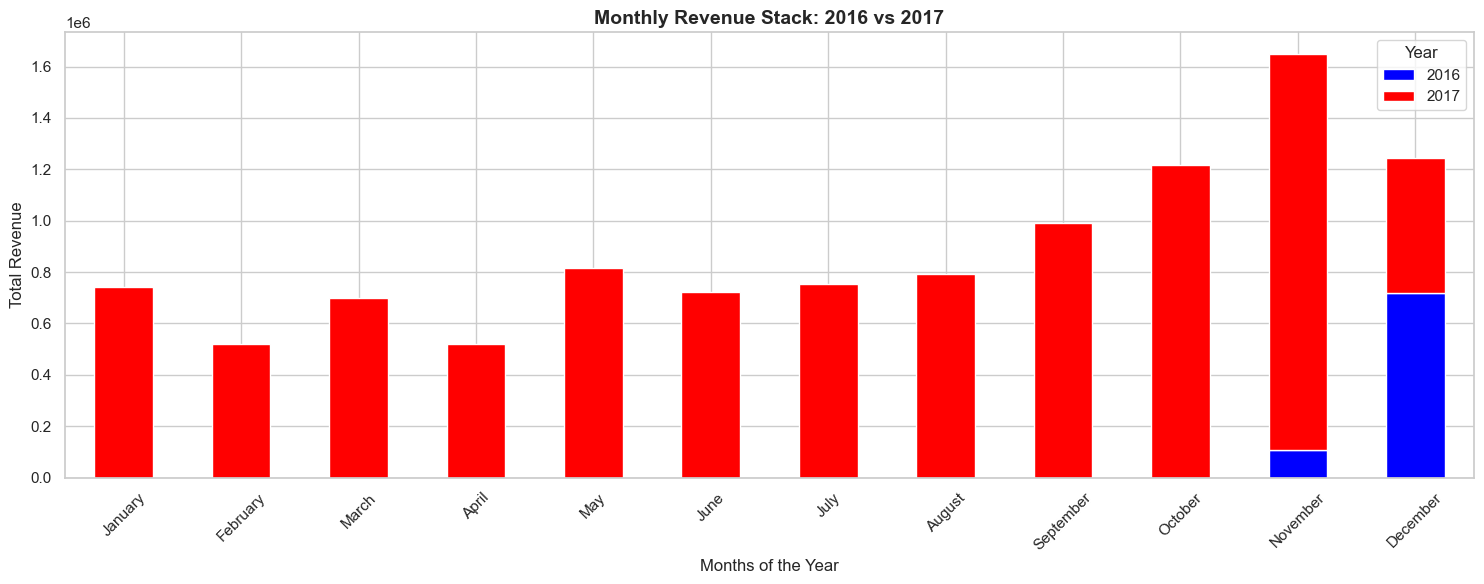

In [31]:
# Plot as stacked bar chart
revenue_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 6),
    color={2016: 'blue', 2017: 'red'}
)

plt.xlabel('Months of the Year', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.title('Monthly Revenue Stack: 2016 vs 2017', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


#### November in the year 2017 was a peak month while December 2016 was a peak month

### Now count how many transactions each customer did:

In [32]:
transaction_frequency = (
    work.groupby('CustomerID')['InvoiceNo']
    .nunique()
    .reset_index()
    .rename(columns={'InvoiceNo': 'Transaction Count'})
    .sort_values(by='Transaction Count', ascending=False)
)

# Display top 10 most frequent shoppers
transaction_frequency.head(10)

CustomerID  Transaction Count
326      12748.0                224
1882     14911.0                217
4016     17841.0                132
563      13089.0                107
1664     14606.0                 98
2179     15311.0                 96
482      12971.0                 89
1692     14646.0                 75
798      13408.0                 68
4207     18102.0                 66

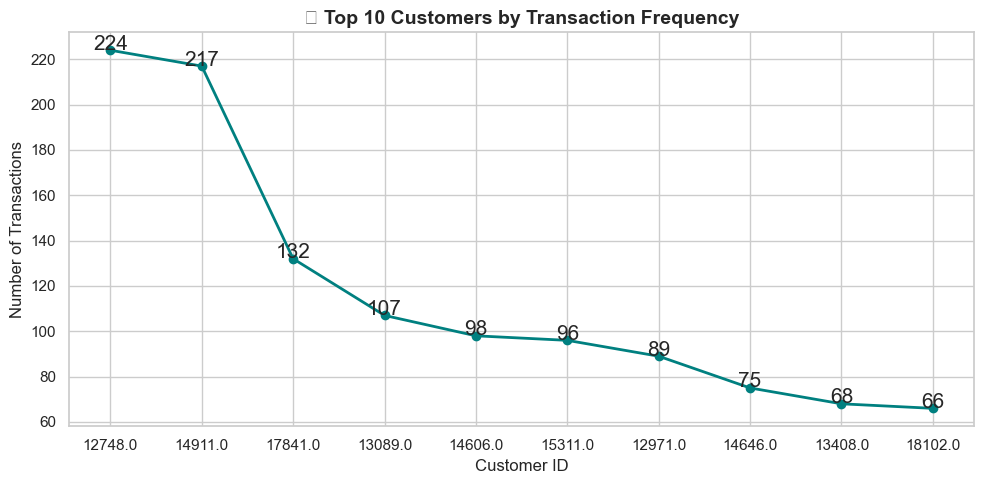

In [33]:
# Get top 10 customers by transaction count
top_customers = transaction_frequency.head(10)

# Plot as a line chart
plt.figure(figsize=(10, 5))
sns.set(style='whitegrid')

plt.plot(
    top_customers['CustomerID'].astype(str),  # Convert to string for categorical x-axis
    top_customers['Transaction Count'],
    marker='o',
    linestyle='-',
    color='teal',
    linewidth=2
)

# Add value labels on each point
for i, val in enumerate(top_customers['Transaction Count']):
    plt.text(i, val + 0.2, str(val), ha='center', fontsize=15)

plt.title('📈 Top 10 Customers by Transaction Frequency', fontsize=14, weight='bold')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()


#### Now i Represent the Location of Transactions In a Chlorpleth Map Using the Country's Column

In [34]:
country_tansactions = work[['InvoiceNo', 'Country']].groupby(['InvoiceNo', 'Country']).count()
country_tansactions = country_tansactions.reset_index(drop = False)
countries = country_tansactions['Country'].value_counts()
country_tansactions.head()

InvoiceNo         Country
0    536365  United Kingdom
1    536366  United Kingdom
2    536367  United Kingdom
3    536368  United Kingdom
4    536369  United Kingdom

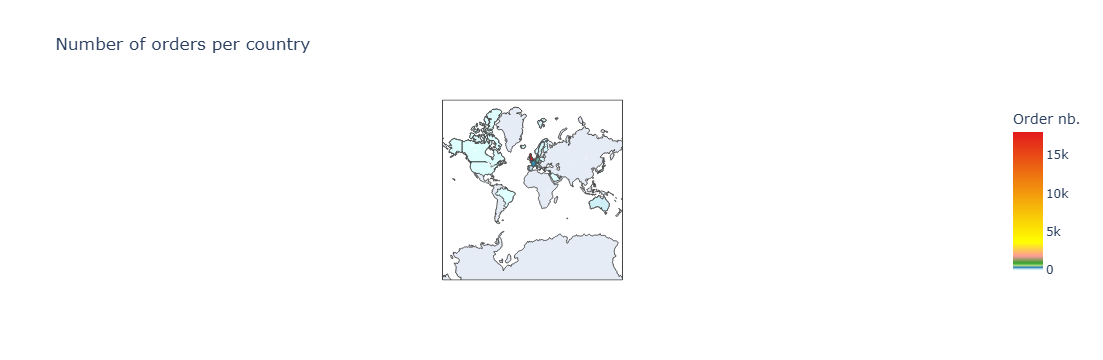

In [35]:
data = dict(type='choropleth',
locations = country_tansactions['Country'].value_counts().index,
locationmode = 'country names', z = country_tansactions['Country'].value_counts(),
text = country_tansactions['Country'].value_counts().index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)


#### Conclusion
We can observe that the 3 countries with the highest transactions are United Kingdom with over 18,000 transactions, Germany (457) and France (392)

### Chekcking for how much each customer generated revenue:

In [36]:
customer_revenue_generated = work.groupby(by = ['CustomerID'], as_index = False)['TotalPrice'].sum()
all_customer_revenue_generated = customer_revenue_generated.rename(columns = {'TotalPrice': 'Revenue_sum'})
all_customer_revenue_generated.sort_values(by ='Revenue_sum',ascending = False,inplace = True)
all_customer_revenue_generated.head()

CustomerID  Revenue_sum
1692     14646.0    282777.64
4207     18102.0    275609.41
3734     17450.0    194592.39
3012     16446.0    168472.50
1882     14911.0    158882.21

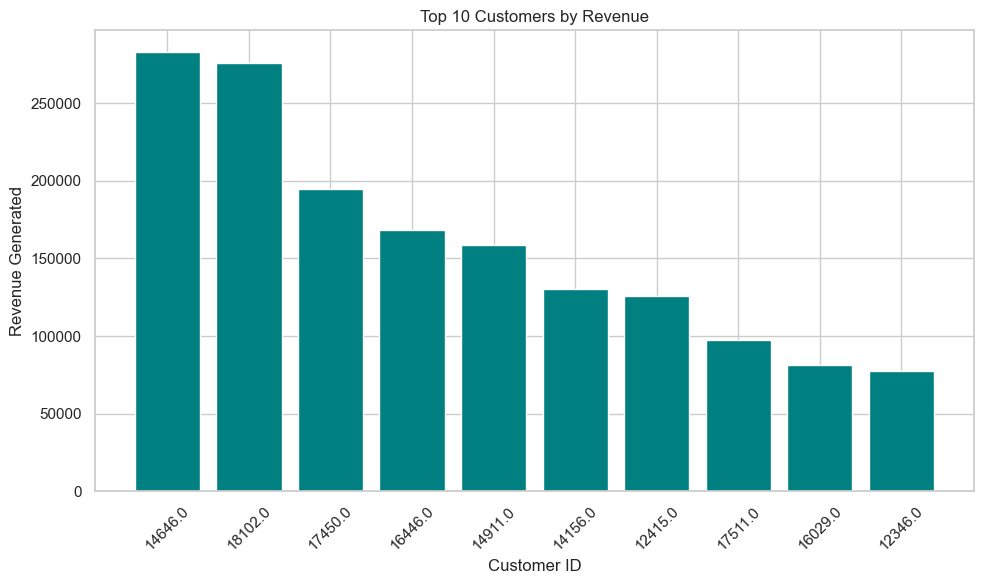

In [37]:
top_customers = all_customer_revenue_generated.head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_customers['CustomerID'].astype(str), top_customers['Revenue_sum'], color='teal')
plt.xlabel('Customer ID')
plt.ylabel('Revenue Generated')
plt.title('Top 10 Customers by Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### CustomerIDs 14646.0, 18102.0 and 17450.0 generated the top highest revenue

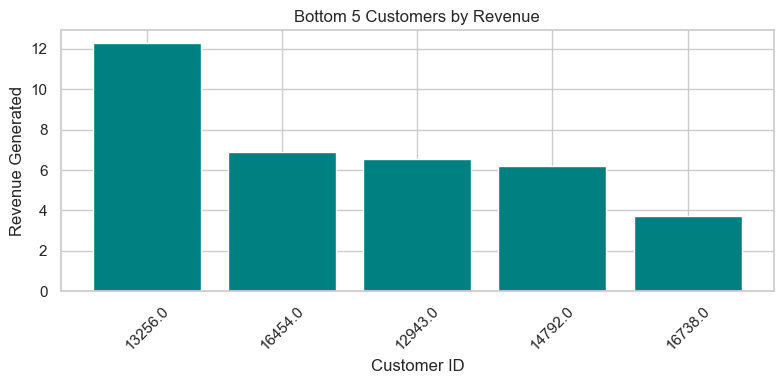

In [38]:
top_customers = all_customer_revenue_generated.tail(5)

# Plot
plt.figure(figsize=(8, 4))
plt.bar(top_customers['CustomerID'].astype(str), top_customers['Revenue_sum'], color='teal')
plt.xlabel('Customer ID')
plt.ylabel('Revenue Generated')
plt.title('Bottom 5 Customers by Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### CustomerIDs 16738.40, 14792.0 and 12943.0 generated the top 3 least revenue

# RFM Model:

In Data science, RFM stands for Recency, Frequency and Monetary. 

The Recency is to check for when last a customer purchased an item in the store

The Frequency is to check for how often a customer purchase items 

The monetary is basically findng out the customer purchasing power

#### Recency:
* Formula: Today's date - Last Purchase date

In [39]:
import datetime as dt

# Latest date in the dataset (or pick your own reference date)
reference_date = work['InvoiceDate'].max() + dt.timedelta(days=1)

# Recency = Days since last purchase
rfm = work.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days
}).rename(columns={'InvoiceDate': 'Recency'})


#### 
Frequency
* Formula: Number of unique invoices per customer

In [40]:
frequency = work.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Step 2: Merge with rfm table
rfm = rfm.reset_index().merge(frequency, on='CustomerID')

#### Monetary
* Formula: Sum of TotalPrice per customer

In [41]:
monetary = work.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

# Merge it into the rfm table
rfm = rfm.reset_index().merge(monetary, on='CustomerID')

### RFM:

In [42]:
rfm.rename(columns = {'InvoiceDate': 'Recency',
                      'InvoiceNo': 'Frequency',
                      'Revenue': 'Monetary'},
inplace = True)
rfm.head(10)

index  CustomerID  Recency  Frequency  Monetary
0      0     12346.0      326          1  77183.60
1      1     12347.0        3          7   4310.00
2      2     12348.0       76          5   3366.27
3      3     12349.0       19          1   1757.55
4      4     12350.0      311          1    334.40
5      5     12352.0       37          9   4240.56
6      6     12353.0      205          1     89.00
7      7     12354.0      233          1   1079.40
8      8     12355.0      215          1    459.40
9      9     12356.0       23          3   2811.43

In [43]:
# Convert Recency, Frequency, Monetary scores to quantiles (1 to 5)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Convert all scores to integers so we can perform numeric aggregations
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)


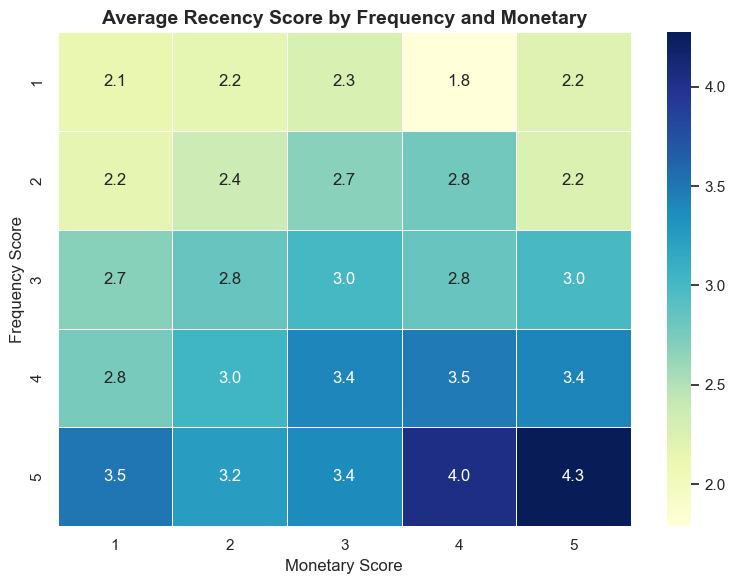

In [44]:
heatmap_data = rfm.pivot_table(
    index='F_Score',
    columns='M_Score',
    values='R_Score',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5)

plt.title('Average Recency Score by Frequency and Monetary', fontsize=14, weight='bold')
plt.xlabel('Monetary Score')
plt.ylabel('Frequency Score')
plt.tight_layout()
plt.show()


In [45]:
from scipy.stats import skew

print("Recency Skewness: ", skew(rfm['Recency']))
print("Frequency Skewness: ", skew(rfm['Frequency']))
print("Monetary Skewness: ", skew(rfm['Monetary']))

Recency Skewness:  1.2435044687155912
Frequency Skewness:  11.888190790085705
Monetary Skewness:  17.6426016499529


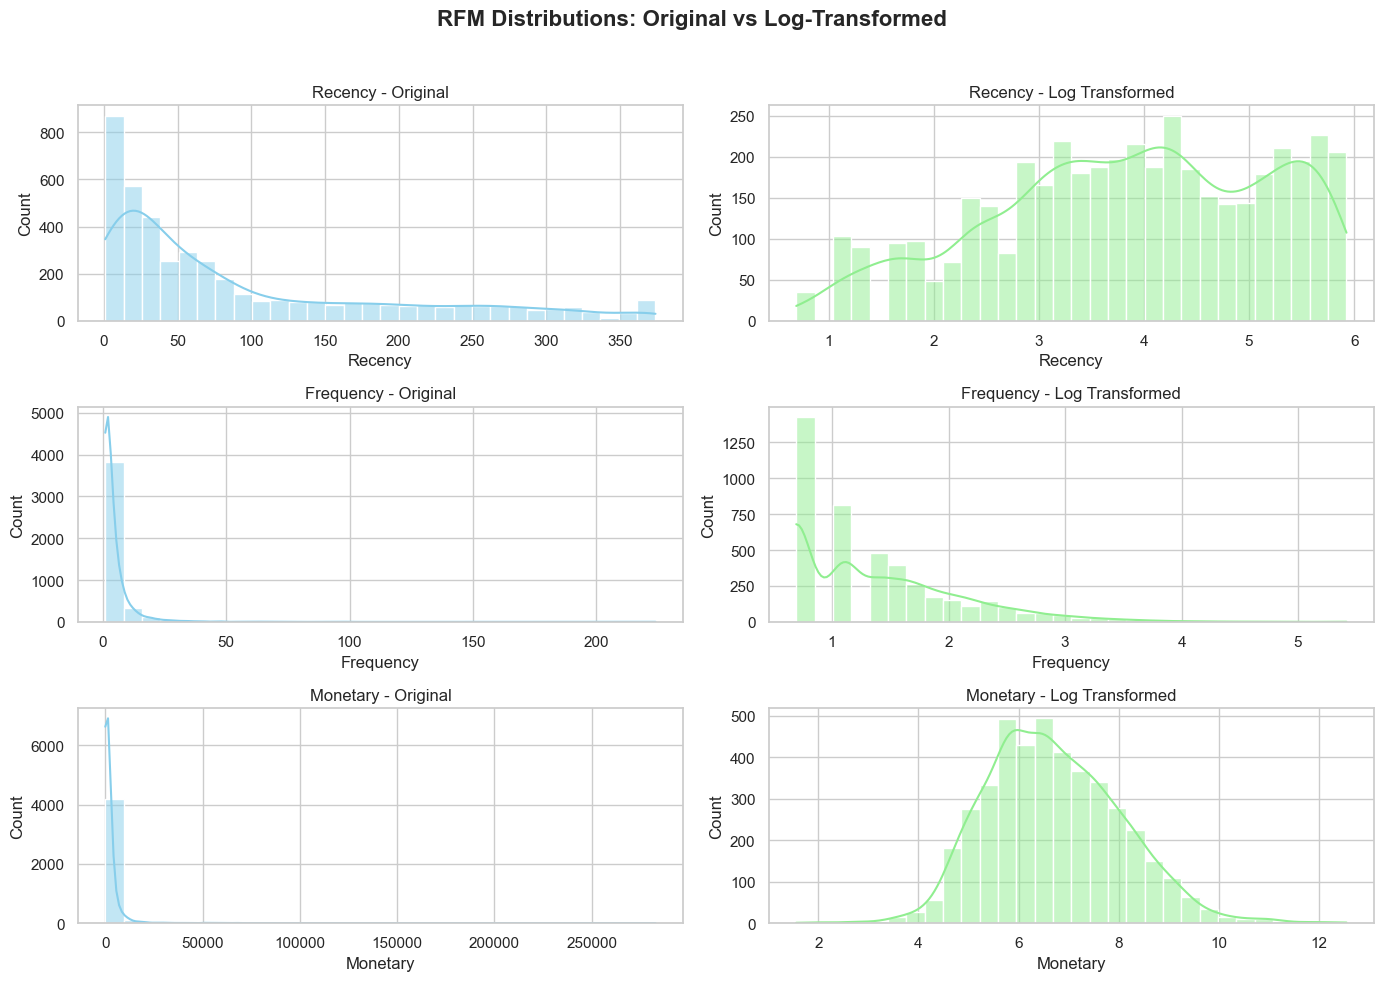

In [46]:
# Apply log1p transformation
rfm_log = rfm.copy()
rfm_log['Recency'] = np.log1p(rfm['Recency'])
rfm_log['Frequency'] = np.log1p(rfm['Frequency'])
rfm_log['Monetary'] = np.log1p(rfm['Monetary'])

# Plot original vs log-transformed distributions
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle('RFM Distributions: Original vs Log-Transformed', fontsize=16, weight='bold')

features = ['Recency', 'Frequency', 'Monetary']

for i, feature in enumerate(features):
    # Original
    sns.histplot(rfm[feature], bins=30, ax=axes[i, 0], color='skyblue', kde=True)
    axes[i, 0].set_title(f'{feature} - Original')
    axes[i, 0].set_ylabel('Count')
    
    # Log-transformed
    sns.histplot(rfm_log[feature], bins=30, ax=axes[i, 1], color='lightgreen', kde=True)
    axes[i, 1].set_title(f'{feature} - Log Transformed')
    axes[i, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [47]:
R_labels = range(4, 0, -1); F_labels = range(1, 5)
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels = R_labels)

In [48]:
F_labels = range(1, 5)
rfm['F']= pd.qcut(rfm['Frequency'], q=6, labels=F_labels, duplicates = 'drop') 

In [49]:
M_labels = range(1, 5)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels = M_labels)

In [50]:
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].astype(int).sum(axis=1)

In [51]:
rfm.head()

index  CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0      0     12346.0      326          1  77183.60        1        1        5   
1      1     12347.0        3          7   4310.00        5        5        5   
2      2     12348.0       76          5   3366.27        2        4        5   
3      3     12349.0       19          1   1757.55        4        1        4   
4      4     12350.0      311          1    334.40        1        1        2   

   R  F  M  RFM_Score  
0  1  1  4          6  
1  4  3  4         11  
2  2  3  4          9  
3  3  1  3          7  
4  1  1  2          4

In [52]:
rfm['RFM_Score'].max()

12

In [53]:
rfm['RFM_Score'].min()

3

In [54]:
def RFM_level(rfm):
    if rfm['RFM_Score'] >= 9:
        return 'Best Customer'
    elif rfm['RFM_Score'] >= 5 and rfm['RFM_Score'] < 9:
        return 'Loyal Customer'
    elif rfm['RFM_Score'] >=1 and rfm['RFM_Score'] < 5:
        return 'Less active customer'
rfm['RFM_level'] = rfm.apply(RFM_level, axis =1)

In [55]:
rfm.head()

index  CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0      0     12346.0      326          1  77183.60        1        1        5   
1      1     12347.0        3          7   4310.00        5        5        5   
2      2     12348.0       76          5   3366.27        2        4        5   
3      3     12349.0       19          1   1757.55        4        1        4   
4      4     12350.0      311          1    334.40        1        1        2   

   R  F  M  RFM_Score             RFM_level  
0  1  1  4          6        Loyal Customer  
1  4  3  4         11         Best Customer  
2  2  3  4          9         Best Customer  
3  3  1  3          7        Loyal Customer  
4  1  1  2          4  Less active customer

In [56]:
rfm = rfm.drop('index', axis=1)
rfm.sample(6)

CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  R  \
451      12929.0      312          1    117.85        1        1        1  1   
3473     17079.0       79          1    118.80        2        2        1  2   
1919     14967.0       50          1    463.80        3        1        2  3   
302      12718.0       72          1    238.25        3        1        1  2   
615      13155.0       34          4    971.76        3        4        3  3   
3219     16735.0       79          5   2300.56        2        4        4  2   

      F  M  RFM_Score             RFM_level  
451   1  1          3  Less active customer  
3473  1  1          4  Less active customer  
1919  1  2          6        Loyal Customer  
302   1  1          4  Less active customer  
615   2  3          8        Loyal Customer  
3219  3  4          9         Best Customer

# K-Means Clustering

K-Means is an unsupervised learning algorithm that performs the division of objects into clusters that share similarities and are disimilar to the objects belonging to another cluster. In this data, the Recency, Frequency and Monetary values will be used to cluster customers

Before K-means clustering is achieved, Elbow method is carried out.

The Elbow method is a process carried out in order to determine how many numbers of clusters should be selected

### Elbow Method:

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [58]:
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Elbow method to find optimal k
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)  # inertia = WCSS


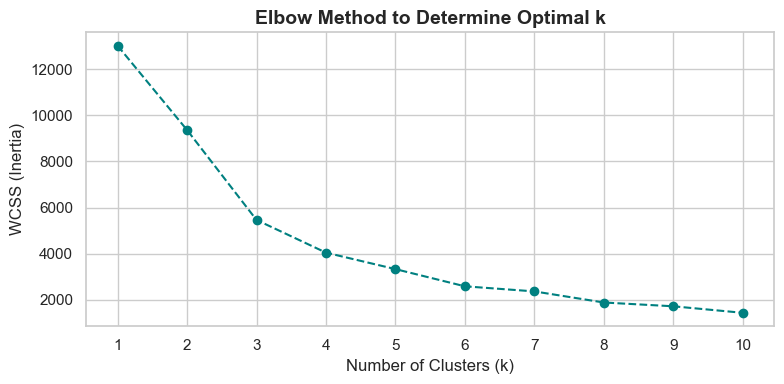

In [59]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='teal')
plt.title('Elbow Method to Determine Optimal k', fontsize=14, weight='bold')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion: 

From the Elbow method, I conclude that the total number of clusters to be chosen is 3


### Training the Kmeans Model:

In [60]:
from sklearn.cluster import KMeans

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [62]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(rfm_scaled)

# Assign cluster labels to customers
rfm['Cluster'] = kmeans.labels_

# Preview the results
print(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster']].head(10))

   CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      326          1  77183.60        1
1     12347.0        3          7   4310.00        0
2     12348.0       76          5   3366.27        0
3     12349.0       19          1   1757.55        0
4     12350.0      311          1    334.40        1
5     12352.0       37          9   4240.56        0
6     12353.0      205          1     89.00        1
7     12354.0      233          1   1079.40        1
8     12355.0      215          1    459.40        1
9     12356.0       23          3   2811.43        0


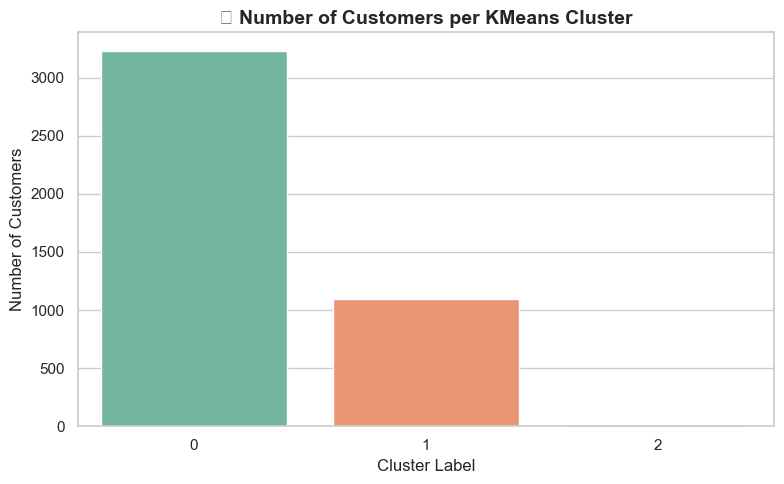

In [63]:
plt.figure(figsize=(8, 5))
sns.countplot(data=rfm, x='Cluster', palette='Set2')

plt.title('📊 Number of Customers per KMeans Cluster', fontsize=14, weight='bold')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [64]:
print("KMeans cluster labels:", np.unique(kmeans.labels_))
print("Cluster distribution:\n", rfm['Cluster'].value_counts())


KMeans cluster labels: [0 1 2]
Cluster distribution:
 Cluster
0    3229
1    1092
2      23
Name: count, dtype: int64


##### After choosing optimal number of clusters to be 3, I can observe that choosing 3 as optimal number of cluster does not offer much practical segmentation cause of the distribution, that is, the scaling  caused the cluster centroid to pull too few points.

In [65]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(rfm_scaled)

# Assign cluster labels to customers
rfm['Cluster'] = kmeans.labels_

# Preview the results
print(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster']].head(10))

   CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      326          1  77183.60        1
1     12347.0        3          7   4310.00        0
2     12348.0       76          5   3366.27        0
3     12349.0       19          1   1757.55        0
4     12350.0      311          1    334.40        1
5     12352.0       37          9   4240.56        0
6     12353.0      205          1     89.00        1
7     12354.0      233          1   1079.40        1
8     12355.0      215          1    459.40        1
9     12356.0       23          3   2811.43        0


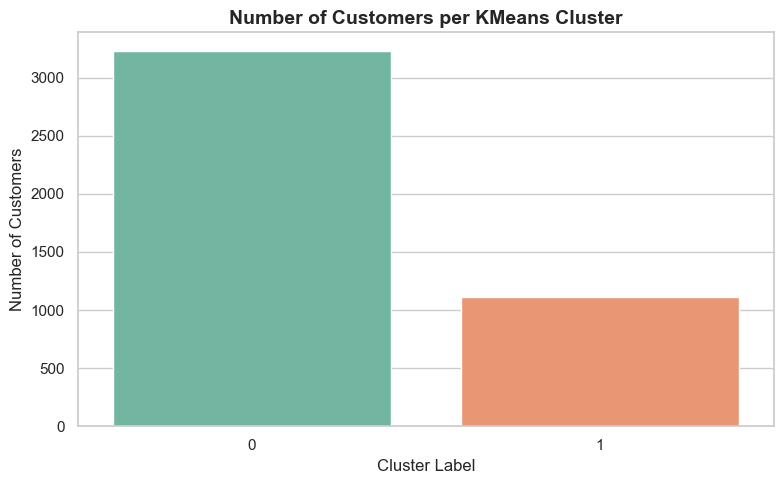

In [66]:
plt.figure(figsize=(8, 5))
sns.countplot(data=rfm, x='Cluster', palette='Set2')

plt.title('Number of Customers per KMeans Cluster', fontsize=14, weight='bold')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [67]:
print("Cluster distribution:\n", rfm['Cluster'].value_counts())

Cluster distribution:
 Cluster
0    3228
1    1116
Name: count, dtype: int64


In [68]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)

Recency  Frequency  Monetary
Cluster                              
0          40.82       5.59   3052.74
1         244.12       1.71    726.43

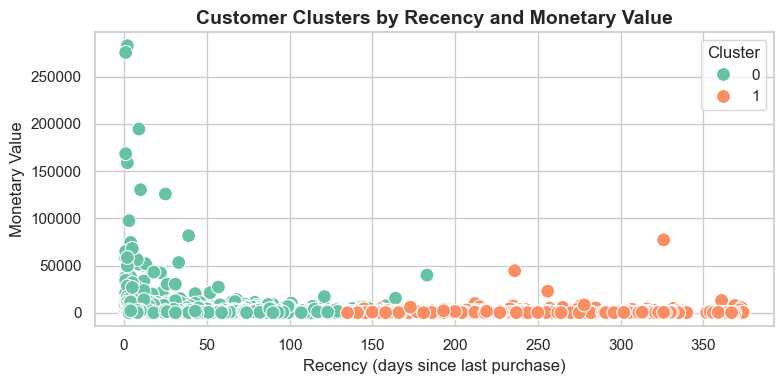

In [69]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Step 2: KMeans clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 3: Cluster profiling
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
cluster_counts = rfm['Cluster'].value_counts().sort_index()
cluster_profile['Customer Count'] = cluster_counts

# Step 4: Visualization - Scatter Plot
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=rfm,
    x='Recency',
    y='Monetary',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title("Customer Clusters by Recency and Monetary Value", fontsize=14, weight='bold')
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Monetary Value")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [70]:
# First, review average RFM values per cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'}).round(1)

print(cluster_summary)


         Recency  Frequency  Monetary  Count
Cluster                                     
0           40.8        5.6    3052.7   3228
1          244.1        1.7     726.4   1116


In [71]:
# Define segment names
segment_map = {
    0: '🏆 High-Value Loyal Customer',
    1: '⛔ Low Engagement Customer'
}

# Apply segment names to the data
rfm['Segment'] = rfm['Cluster'].map(segment_map)

In [72]:
rfm['Segment'].head(10)

0      ⛔ Low Engagement Customer
1    🏆 High-Value Loyal Customer
2    🏆 High-Value Loyal Customer
3    🏆 High-Value Loyal Customer
4      ⛔ Low Engagement Customer
5    🏆 High-Value Loyal Customer
6      ⛔ Low Engagement Customer
7      ⛔ Low Engagement Customer
8      ⛔ Low Engagement Customer
9    🏆 High-Value Loyal Customer
Name: Segment, dtype: object

In [73]:
rfm['Kmeans cluster'] = kmeans.labels_

# Define 2 colors (for clusters 0 and 1)
Colors = ['red', 'blue']

# Define 2 business strategies/advice
Advice = [
    'Target with product ads and Promotion offers',
    'Promote loyalty programs and discounts'
]

# Map color and advice to each cluster
rfm['Color'] = rfm['Kmeans cluster'].map(lambda x: Colors[x])
rfm['Advice'] = rfm['Kmeans cluster'].map(lambda x: Advice[x])


In [74]:
rfm.head()

CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  R  F  \
0     12346.0      326          1  77183.60        1        1        5  1  1   
1     12347.0        3          7   4310.00        5        5        5  4  3   
2     12348.0       76          5   3366.27        2        4        5  2  3   
3     12349.0       19          1   1757.55        4        1        4  3  1   
4     12350.0      311          1    334.40        1        1        2  1  1   

   M  RFM_Score             RFM_level  Cluster                      Segment  \
0  4          6        Loyal Customer        1    ⛔ Low Engagement Customer   
1  4         11         Best Customer        0  🏆 High-Value Loyal Customer   
2  4          9         Best Customer        0  🏆 High-Value Loyal Customer   
3  3          7        Loyal Customer        0  🏆 High-Value Loyal Customer   
4  2          4  Less active customer        1    ⛔ Low Engagement Customer   

   Kmeans cluster Color                                        Advice  
0               1  blue        Promote loyalty programs and discounts  
1               0   red  Target with product ads and Promotion offers  
2               0   red  Target with product ads and Promotion offers  
3               0   red  Target with product ads and Promotion offers  
4               1  blue        Promote loyalty programs and discounts

In [75]:
rfm.sample(5)

CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  R  \
4305     18231.0      193          5   2083.27        1        4        4  1   
3323     16872.0       78          3    680.02        2        3        3  2   
3454     17052.0       29          1    413.75        4        2        2  3   
358      12794.0       54          3   1147.26        3        3        4  2   
2284     15452.0       30          4    622.53        4        4        3  3   

      F  M  RFM_Score       RFM_level  Cluster                      Segment  \
4305  3  4          8  Loyal Customer        1    ⛔ Low Engagement Customer   
3323  2  2          6  Loyal Customer        0  🏆 High-Value Loyal Customer   
3454  1  2          6  Loyal Customer        0  🏆 High-Value Loyal Customer   
358   2  3          7  Loyal Customer        0  🏆 High-Value Loyal Customer   
2284  2  2          7  Loyal Customer        0  🏆 High-Value Loyal Customer   

      Kmeans cluster Color                                        Advice  
4305               1  blue        Promote loyalty programs and discounts  
3323               0   red  Target with product ads and Promotion offers  
3454               0   red  Target with product ads and Promotion offers  
358                0   red  Target with product ads and Promotion offers  
2284               0   red  Target with product ads and Promotion offers

### Gaussian Clustering:

In [76]:
from sklearn.mixture import GaussianMixture
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# 2. Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# 3. Apply Gaussian Mixture Model with 3 clusters (you can change n_components)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(rfm_scaled)

# 4. Add the cluster labels back to your original RFM dataframe
rfm['GMM_Cluster'] = gmm_labels

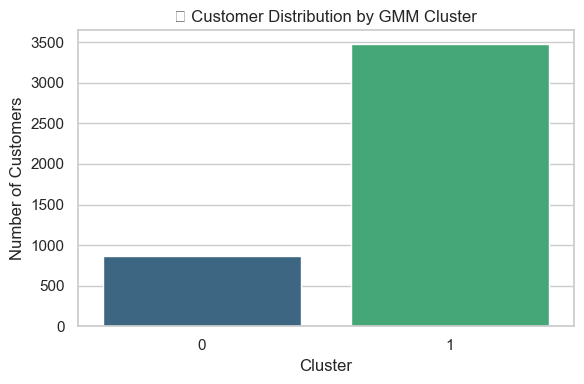

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(x='GMM_Cluster', data=rfm, palette='viridis')
plt.title('📊 Customer Distribution by GMM Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [78]:
rfm['GMM_Cluster'].value_counts().sort_index()

GMM_Cluster
0     871
1    3473
Name: count, dtype: int64

In [79]:
rfm.groupby('GMM_Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

Recency  Frequency  Monetary
GMM_Cluster                              
0               34.4       13.1    9220.2
1              107.7        2.5     758.5

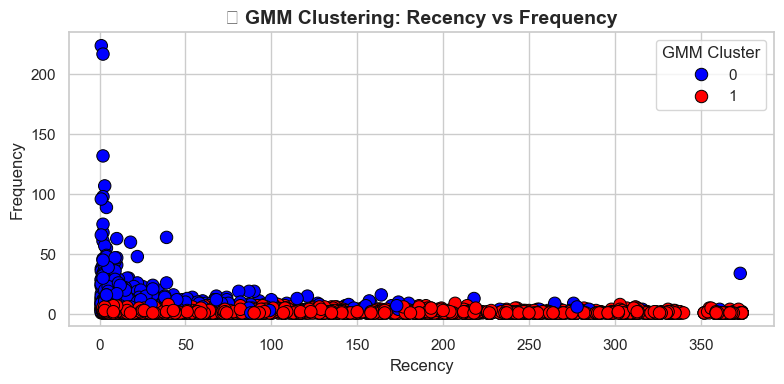

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.scatterplot(
    x='Recency', y='Frequency',
    data=rfm,
    hue='GMM_Cluster',
    palette=['blue', 'red'],  # One color per cluster
    s=80, edgecolor='black'
)
plt.title('📊 GMM Clustering: Recency vs Frequency', fontsize=14, weight='bold')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='GMM Cluster')
plt.tight_layout()
plt.show()


In [81]:
cluster_summary = rfm.groupby('GMM_Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
print(cluster_summary)

             Recency  Frequency  Monetary
GMM_Cluster                              
0              34.44      13.07   9220.20
1             107.75       2.47    758.47


In [82]:
# Step 2: Map labels based on analysis
gmm_segment_map = {
    0: '🏆 High-Value Loyal Customer',
    1: '⛔ Low Engagement Customer'
}

rfm['GMM_Segment'] = rfm['GMM_Cluster'].map(gmm_segment_map)

In [83]:
# Map segment labels
gmm_segment_map = {
    0: '🏆 High-Value Loyal Customer',
    1: '⛔ Low Engagement Customer'
}

# Map color
gmm_color_map = {
    0: 'red',
    1: 'blue'
}

# Map advice
gmm_advice_map = {
    0: 'Target with product ads and promotion offers',
    1: 'Promote loyalty programs and discounts'
}

# Apply mappings
rfm['GMM_Segment'] = rfm['GMM_Cluster'].map(gmm_segment_map)
rfm['GMM_Color'] = rfm['GMM_Cluster'].map(gmm_color_map)
rfm['GMM_Advice'] = rfm['GMM_Cluster'].map(gmm_advice_map)

In [84]:
final_gmm_output = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score',
                        'GMM_Cluster', 'GMM_Segment', 'GMM_Color', 'GMM_Advice']]

final_gmm_output.head(10)

CustomerID  Recency  Frequency  Monetary  RFM_Score  GMM_Cluster  \
0     12346.0      326          1  77183.60          6            0   
1     12347.0        3          7   4310.00         11            0   
2     12348.0       76          5   3366.27          9            0   
3     12349.0       19          1   1757.55          7            1   
4     12350.0      311          1    334.40          4            1   
5     12352.0       37          9   4240.56         11            0   
6     12353.0      205          1     89.00          3            1   
7     12354.0      233          1   1079.40          5            1   
8     12355.0      215          1    459.40          4            1   
9     12356.0       23          3   2811.43          9            0   

                   GMM_Segment GMM_Color  \
0  🏆 High-Value Loyal Customer       red   
1  🏆 High-Value Loyal Customer       red   
2  🏆 High-Value Loyal Customer       red   
3    ⛔ Low Engagement Customer      blue   
4    ⛔ Low Engagement Customer      blue   
5  🏆 High-Value Loyal Customer       red   
6    ⛔ Low Engagement Customer      blue   
7    ⛔ Low Engagement Customer      blue   
8    ⛔ Low Engagement Customer      blue   
9  🏆 High-Value Loyal Customer       red   

                                     GMM_Advice  
0  Target with product ads and promotion offers  
1  Target with product ads and promotion offers  
2  Target with product ads and promotion offers  
3        Promote loyalty programs and discounts  
4        Promote loyalty programs and discounts  
5  Target with product ads and promotion offers  
6        Promote loyalty programs and discounts  
7        Promote loyalty programs and discounts  
8        Promote loyalty programs and discounts  
9  Target with product ads and promotion offers

### Models Evaluation:

In [85]:
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm_features)

score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.55


In [86]:
from sklearn.metrics import silhouette_score
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Compute silhouette score
gmm_silhouette = silhouette_score(rfm_features, rfm['GMM_Cluster'])

print(f"Silhouette Score for GMM Clustering: {gmm_silhouette:.4f}")

Silhouette Score for GMM Clustering: 0.6650


### From the Model evaluation, Gausuan Clustering performed better, hence it is chosen as the best model

In [87]:
gmm = final_gmm_output.dropna().copy()

In [88]:
gmm.to_csv('gmm.csv', index=False)